# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Steven Gerald Parsaoran Berutu
- **Email:** m014b4ky4214@bangkit.academy
- **ID Dicoding:** steven_gerald_parsaoran_berutu_m014b4ky4214_SMqw

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penjualan berdasarkan kategori produk? 
- Berapa lama rata-rata waktu yang dibutuhkan dari tanggal pemesanan hingga produk diterima oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca semua dataset
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
product_categories = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

**Insight:**
- proses ini merupakan proses gathering data dengan menggunakan library pandas
- masing masing data diberi nama variabel yang mendefinisikan masing masing data tersebut


### Assessing Data

In [3]:
# Memeriksa missing values dan data duplikat
print(customers.info())
print(customers.duplicated().sum())

print("===========================")
print(orders.info())
print(orders.duplicated().sum())


print("===========================")
# Mengidentifikasi kolom penting dalam dataset
print(orders.head())
print(order_items.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  ob

**Insight:**
- Dari 2 kategori data yang diperlukan, tidak terdapat data kosong pada data tersebut.
- Data siap untuk diolah

### Cleaning Data

In [4]:
# Konversi kolom waktu menjadi tipe datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])


**Insight:**
- mengkonversi tipe data waktu format datetime menggunakan pandas


## Exploratory Data Analysis (EDA)

### Explore Data for 1st Question

In [5]:
# Gabungkan dataset untuk pertanyaan 1
order_product = pd.merge(order_items, products, on='product_id', how='left')
order_product = pd.merge(order_product, product_categories, on='product_category_name', how='left')

# Hitung jumlah produk terjual berdasarkan kategori
sales_by_category = order_product.groupby('product_category_name_english').size().sort_values(ascending=False)

print(sales_by_category.head())


product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
dtype: int64


### Explore Data for 2nd Question

In [6]:
# Menghitung waktu pengiriman
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Hitung rata-rata waktu pengiriman
avg_delivery_time = orders['delivery_time'].mean()

print(f'Rata-rata waktu pengiriman adalah {avg_delivery_time} hari.')


Rata-rata waktu pengiriman adalah 12.094085575687217 hari.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

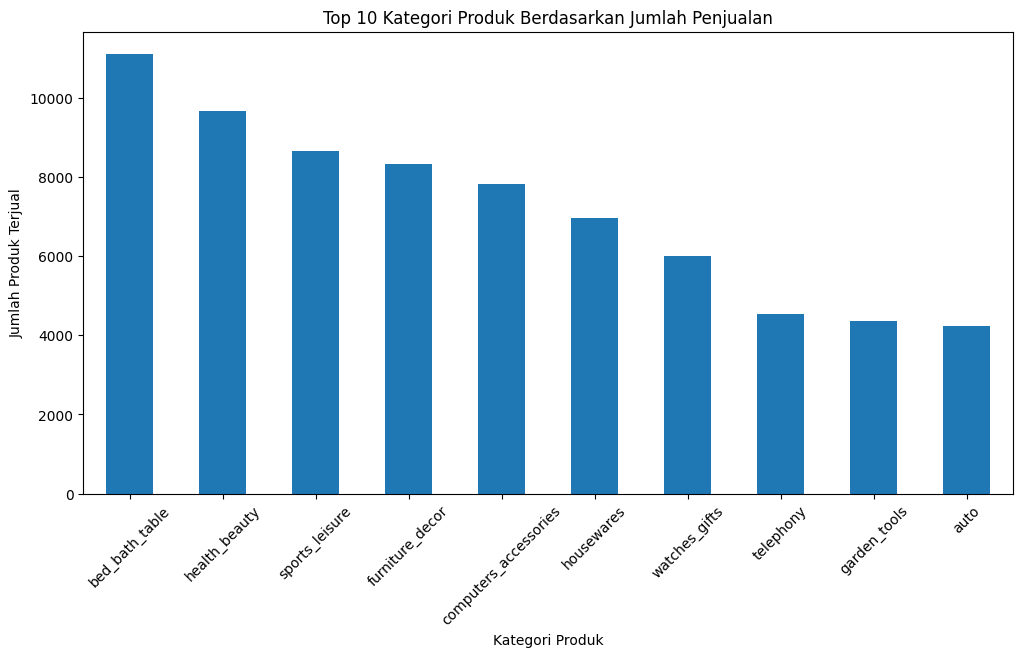

In [7]:
# Plot distribusi penjualan berdasarkan kategori produk
plt.figure(figsize=(12, 6))
sales_by_category.head(10).plot(kind='bar')
plt.title('Top 10 Kategori Produk Berdasarkan Jumlah Penjualan')
plt.ylabel('Jumlah Produk Terjual')
plt.xlabel('Kategori Produk')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

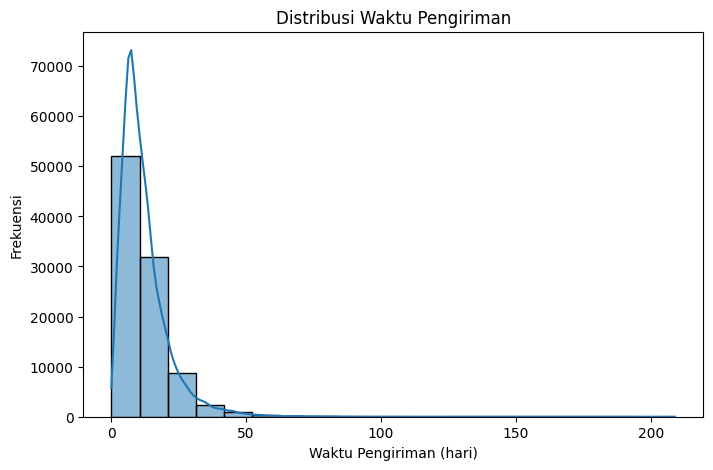

In [8]:
# Plot histogram waktu pengiriman
plt.figure(figsize=(8, 5))
sns.histplot(orders['delivery_time'].dropna(), bins=20, kde=True)
plt.title('Distribusi Waktu Pengiriman')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Frekuensi')
plt.show()

## Conclusion

- Produk bed_bath_table merupakan produk dengan penjualan terbanyak berdasarkan distribusi penjualan produk
- Rata - rata pengiriman barang memakan waktu hingga 12 hari.